In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Specify the path to your text file
file_path = '/content/drive/MyDrive/Data_Mining_CMPE_255/cat_words.txt'

# Use 'with' statement to open the file
with open(file_path, 'r') as file:
    # Read the contents of the file
    text_data = file.readlines()

print(text_data)

['In comparison to dogs, cats have not undergone major changes during the domestication process.\n', 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n', 'A common interactive use of cat for a single file is to output the content of a file to standard output.\n', 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\n', 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n', 'The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.\n', 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n', 'However, if the output is piped or redirected, cat is unnecessary.\n', 'cat with one named file is safer where human

In [20]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import pandas as pd

# Function to load data from a text file
def load_data(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

# Function to encode text using a pretrained model (BERT in this case)
def encode_text(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Taking the mean across all tokens (to get a single vector per text snippet)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Example with a BERT model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Encoding all text data
embeddings = [encode_text(text, tokenizer, model).numpy() for text in text_data]

# Convert list of embeddings to a 2D array
embeddings_array = np.vstack(embeddings)

In [21]:
from sklearn.cluster import KMeans

# Clustering
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(embeddings)

# Adding cluster information to the DataFrame
clustered_data = pd.DataFrame({'text': text_data, 'cluster': clusters})

# Displaying the clustered data
print(clustered_data)

                                                 text  cluster
0   In comparison to dogs, cats have not undergone...        2
1   As cat simply catenates streams of bytes, it c...        1
2   A common interactive use of cat for a single f...        1
3   Cats can hear sounds too faint or too high in ...        2
4   In one, people deliberately tamed cats in a pr...        2
5   The domesticated cat and its closest wild ance...        2
6   Domestic cats are similar in size to the other...        2
7   However, if the output is piped or redirected,...        1
8   cat with one named file is safer where human e...        1
9   In terms of legibility, a sequence of commands...        1
10  Cat command is one of the basic commands that ...        1
11  Using cat command, the lines received from std...        1
12  When you type simply cat command without any a...        1
13  Leopard was released on October 26, 2007 as th...        0
14  According to Apple, Leopard contains over 300 ...  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


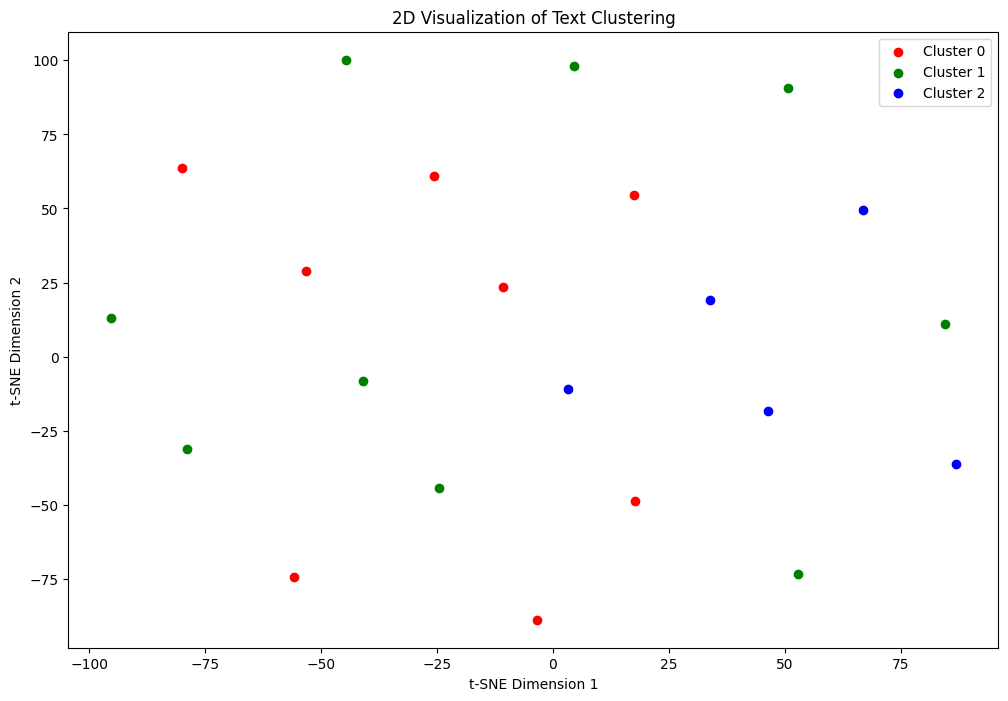

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Number of data points
n_samples = len(embeddings_array)

# Setting perplexity to a smaller value if the dataset is small
perplexity_value = min(30, n_samples - 1)  # 30 is a common default value for perplexity

# Applying t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plotting
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']
for i in range(num_clusters):
    cluster_indices = np.where(clusters == i)[0]
    plt.scatter(reduced_embeddings[cluster_indices, 0], reduced_embeddings[cluster_indices, 1], c=colors[i], label=f'Cluster {i}')

plt.title('2D Visualization of Text Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

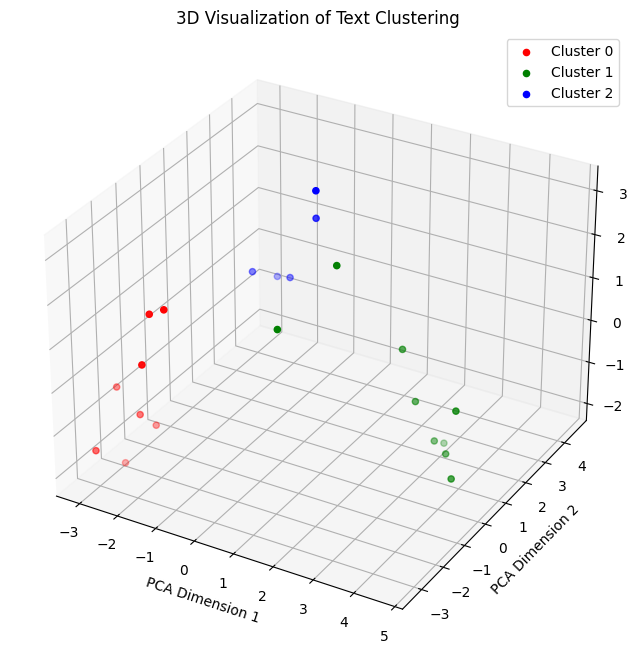

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reducing the embeddings to 3 dimensions using PCA
pca = PCA(n_components=3)
reduced_embeddings_3d = pca.fit_transform(embeddings_array)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
for i in range(num_clusters):
    cluster_indices = np.where(clusters == i)[0]
    ax.scatter(reduced_embeddings_3d[cluster_indices, 0], reduced_embeddings_3d[cluster_indices, 1], reduced_embeddings_3d[cluster_indices, 2], c=colors[i], label=f'Cluster {i}')

ax.set_title('3D Visualization of Text Clustering')
ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')
ax.legend()

plt.show()